In [1]:
from typing import Any, ClassVar, Dict, List, Optional


In [2]:
from ScalableVolumetricBenchmark import *

In [3]:
pi = 3.14
# --- build a 10-qubit circuit using every implemented operation once ---
c = QuantumCircuit(number_of_qubits=10, number_of_classical_bits=10)

# Single-qubit Clifford + phase family
c.add_x_gate(0)
c.add_y_gate(1)
c.add_z_gate(2)
c.add_h_gate(3)
c.add_s_gate(4)
c.add_t_gate(6)

c.add_u_gate(9, theta=pi / 2, phi=pi / 3, lambda_parameter=pi / 4)





# Rotations
c.add_rx_gate(0, theta=0.5)
c.add_ry_gate(1, theta=0.6)
c.add_rz_gate(2, theta=0.7)

# Two-qubit / controlled
c.add_cx_gate(
    [0 for _ in range(c.number_of_qubits - 1)],
    [1 + i for i in range(c.number_of_qubits - 1)],
)
c.add_cy_gate(1, 2)
c.add_cz_gate(2, 3)
c.add_swap_gate(4, 5)  # your current add_swap_gate signature

# Measure all qubits into all classical bits (1:1 mapping)
c.add_measurement(list(range(10)), list(range(10)))


In [4]:
c.draw_circuit_diagram()

q0 ----[x]---[rx]----[c]----[c]----[c]----[c]----[c]----[c]----[c]----[c]----[c]----[M]==
                      |      |      |      |      |      |      |      |      |          
q1 ----[y]---[ry]----[x]-----|------|------|------|------|------|------|------|-----[c]----[M]==
                             |      |      |      |      |      |      |      |      |          
q2 ----[z]---[rz]-----------[x]-----|------|------|------|------|------|------|-----[y]----[c]----[M]==
                                    |      |      |      |      |      |      |             |          
q3 ----[h]-------------------------[x]-----|------|------|------|------|------|------------[z]----[M]==
                                           |      |      |      |      |      |                        
q4 ----[s]--------------------------------[x]-----|------|------|------|------|-----[s]----[M]==
                                                  |      |      |      |      |      |          
q5 -------------

In [5]:
# Create a benchmark with 5 qubits, 20 random Clifford samples.
bench = CliffordVolumeBenchmark(
    number_of_qubits=10,
    sample_size=10,
    format="qasm2",         # optional, default is "qasm2"
    target_sdk="qiskit",   # optional, your own meaning
    workdir="test"      # optional, where JSON will be written
)


# Generate the in-memory dataset
samples = bench.create_benchmark()
print(f"Generated {len(samples)} samples")
path = bench.path 
bench

[Benchmark] Saved to: test\clifford_nq10_s10_20251123T132046_c8fa992e.json
Generated 10 samples


CliffordVolumeBenchmark(
  benchmark_id='clifford_nq10_s10_20251123T132046_c8fa992e',
  number_of_qubits=10,
  sample_size=10,
  format='qasm2',
  target_sdk='qiskit',
  workdir=WindowsPath('test'),
)

In [35]:
bench = CliffordVolumeBenchmark.load_json(path)
bench

CliffordVolumeBenchmark(
  benchmark_id='clifford_nq10_s10_20251123T113949_b9204722',
  number_of_qubits=10,
  sample_size=10,
  format='qasm2',
  target_sdk='qiskit',
  workdir=WindowsPath('test'),
)

In [36]:
# Create a benchmark with 5 qubits, 20 random Clifford samples.
bench = CliffordVolumeBenchmark(
    number_of_qubits=10,
    sample_size=10,
    format="qasm2",         # optional, default is "qasm2"
    target_sdk="qiskit",   # optional, your own meaning
)


# Generate the in-memory dataset
samples = bench.create_benchmark(auto_save=False)
print(f"Generated {len(samples)} samples")

# Save it to JSON; path is "results/clifford_nq5_s20_...json"
path = bench.save_json()
print(f"Saved benchmark to: {path}")

bench

Generated 10 samples
Saved benchmark to: .benchmarks\clifford_nq10_s10_20251123T114016_3f1621e4.json


CliffordVolumeBenchmark(
  benchmark_id='clifford_nq10_s10_20251123T114016_3f1621e4',
  number_of_qubits=10,
  sample_size=10,
  format='qasm2',
  target_sdk='qiskit',
  workdir=WindowsPath('.benchmarks'),
)

In [11]:
# creat witout saving

bench = CliffordVolumeBenchmark(
    number_of_qubits=5,
    sample_size=2,
    format="qasm3",         # optional, default is "qasm2"
    target_sdk="qiskit",   # optional, your own meaning
    workdir="test"      # optional, where JSON will be written
)


# Generate the in-memory dataset
samples = bench.create_benchmark(auto_save=False)
benchmark_json = bench.to_json_dict()

In [12]:
i = 7
benchmark_json['samples'][0]['circuits'][i]

{'circuit_id': '0_destab_2',
 'observable': '-ZZIYI',
 'qasm': 'OPENQASM 3.0;\n\ninclude "stdgates.inc";\n\nqubit[5] q;\nbit[5] c;\n\ncx q[4], q[0];\ncx q[0], q[4];\ncx q[4], q[0];\nh q[0];\nh q[1];\nh q[2];\ncx q[0], q[1];\ncx q[0], q[2];\ncx q[0], q[3];\ncx q[0], q[4];\nh q[3];\nh q[4];\ncx q[3], q[0];\ncx q[4], q[0];\ncx q[2], q[1];\ncx q[1], q[2];\ncx q[2], q[1];\ns q[1];\nh q[1];\ns q[2];\ncx q[1], q[2];\ncx q[1], q[4];\ncx q[3], q[1];\nh q[2];\ns q[2];\ncx q[2], q[3];\nh q[3];\ncx q[3], q[2];\ncx q[4], q[2];\ncx q[4], q[3];\ncx q[3], q[4];\ncx q[4], q[3];\nh q[3];\ns q[3];\ncx q[3], q[4];\nh q[4];\ncx q[4], q[3];\ns q[4];\nh q[4];\nh q[0];\nh q[1];\nh q[4];\ns q[0];\ns q[0];\ns q[1];\ns q[1];\ns q[4];\ns q[4];\nh q[0];\nh q[1];\nh q[4];\ns q[1];\ns q[1];\ns q[2];\ns q[2];\ns q[3];\ns q[3];\nsdg q[3];\nh q[3];\n\nc[0] = measure q[0];\nc[1] = measure q[1];\nc[2] = measure q[2];\nc[3] = measure q[3];\nc[4] = measure q[4];',
 'metadata': {'kind': 'destabilizer', 'index': 2}}

In [13]:
qasmcircuit = benchmark_json['samples'][0]['circuits'][i]['qasm']
obs = benchmark_json['samples'][0]['circuits'][i]['observable']

In [14]:
print(qasmcircuit)

OPENQASM 3.0;

include "stdgates.inc";

qubit[5] q;
bit[5] c;

cx q[4], q[0];
cx q[0], q[4];
cx q[4], q[0];
h q[0];
h q[1];
h q[2];
cx q[0], q[1];
cx q[0], q[2];
cx q[0], q[3];
cx q[0], q[4];
h q[3];
h q[4];
cx q[3], q[0];
cx q[4], q[0];
cx q[2], q[1];
cx q[1], q[2];
cx q[2], q[1];
s q[1];
h q[1];
s q[2];
cx q[1], q[2];
cx q[1], q[4];
cx q[3], q[1];
h q[2];
s q[2];
cx q[2], q[3];
h q[3];
cx q[3], q[2];
cx q[4], q[2];
cx q[4], q[3];
cx q[3], q[4];
cx q[4], q[3];
h q[3];
s q[3];
cx q[3], q[4];
h q[4];
cx q[4], q[3];
s q[4];
h q[4];
h q[0];
h q[1];
h q[4];
s q[0];
s q[0];
s q[1];
s q[1];
s q[4];
s q[4];
h q[0];
h q[1];
h q[4];
s q[1];
s q[1];
s q[2];
s q[2];
s q[3];
s q[3];
sdg q[3];
h q[3];

c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2];
c[3] = measure q[3];
c[4] = measure q[4];


In [16]:

 # Create ideal and noisy virtual quantum devices for testing
#qiskit for  and tests
from qiskit import qasm3
from qiskit import QuantumCircuit as qiskit_QuantumCircuit
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError, pauli_error
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
number_of_qubits = 10

cm = CouplingMap.from_line(num_qubits=number_of_qubits)
noise_model = NoiseModel()
cx_depolarizing_prob = 0.001 # two qubit depolarization error
p_r = 0.001 # for uncorrelated bit-flip readout error

noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"]) # cnot depolarization error
noise_model.add_all_qubit_quantum_error(pauli_error([('X',p_r), ('I', 1 - p_r)]), "measure") # simple readout bitflip error

basis_gates=['cx', 'rx', 'ry', 'ry', 'p']

ideal_backend = AerSimulator(basis_gates=basis_gates)
ideal_pass_manager = generate_preset_pass_manager(optimization_level=3, basis_gates=['cx', 'rx', 'ry', 'ry', 'p'])

noisy_backend = AerSimulator(noise_model=noise_model, basis_gates=basis_gates)
noisy_pass_manager = generate_preset_pass_manager(optimization_level=3, basis_gates=['cx', 'rx', 'ry', 'ry', 'p'])

In [17]:
bench = CliffordVolumeBenchmark(
    number_of_qubits=3,
    sample_size=3,
    format="qasm3",         # optional, default is "qasm2"
    target_sdk="qiskit",   # optional, your own meaning
    workdir="test",
    benchmark_id = 'Clifford_test_1',
    shots = 2048
)


# Generate the in-memory dataset
samples = bench.create_benchmark()
print(f"Generated {len(samples)} samples")
path = bench.path 
bench

[Benchmark] Saved to: test\Clifford_test_1.json
Generated 3 samples


CliffordVolumeBenchmark(
  benchmark_id='Clifford_test_1',
  number_of_qubits=3,
  sample_size=3,
  format='qasm3',
  target_sdk='qiskit',
  workdir=WindowsPath('test'),
)

In [18]:
qiskit_circuits = [noisy_pass_manager.run(qasm3.loads(qc)) for qc in bench.get_all_circuits()]

In [19]:
job = noisy_backend.run(qiskit_circuits, shots=bench.shots)

result = job.result()
results_1 = result.get_counts()

for i,r in enumerate(results_1):
    keys = list(r.keys())
    new_r={}
    
    for k in keys:
        new_r[k[::-1]] = r[k]

    results_1[i] = new_r

In [20]:
results_2 = {}

for k, key in enumerate(bench.get_all_circuit_ids()):
    results_2[key] = results_1[k]

In [21]:
#add results to the benchmark

In [22]:
bench.add_experimental_results(results_1)

[Benchmark] Saved to: test\Clifford_test_1.json


In [23]:
CliffordVolumeBenchmark.load_json(path).to_json_dict()['experimental_results']['results']['0_stab_0']

{'counts': {'111': 511,
  '000': 500,
  '110': 532,
  '001': 500,
  '100': 2,
  '101': 1,
  '011': 1,
  '010': 1}}

In [24]:
bench.add_experimental_results(results_2)

[Benchmark] Saved to: test\Clifford_test_1.json


In [25]:
CliffordVolumeBenchmark.load_json(path).to_json_dict()['experimental_results']['results']['0_stab_0']

{'counts': {'111': 511,
  '000': 500,
  '110': 532,
  '001': 500,
  '100': 2,
  '101': 1,
  '011': 1,
  '010': 1}}

In [26]:
circuits = CliffordVolumeBenchmark.load_json(path).to_json_dict()['samples'][0]['circuits']

In [27]:
for qc in circuits:    
    count = CliffordVolumeBenchmark.load_json(path).to_json_dict()['experimental_results']['results'][qc['circuit_id']]['counts']
    print(qc['circuit_id'], '==>', bench.expected_value(count, qc['observable'])  )

0_stab_0 ==> 0.9951171875
0_stab_1 ==> 0.9833984375
0_stab_2 ==> 0.982421875
0_destab_0 ==> 0.013671875
0_destab_1 ==> 0.005859375
0_destab_2 ==> -0.0224609375


In [28]:
r = bench.evaluate_benchmark()


 Clifford Benchmark Evaluation (3 qubits)

Stabilizer expectation values:
  • average: 0.988281 ± 0.004319
  • lowest measured value: 0.982422

Destabilizer expectation values:
  • average: -0.001085 ± 0.012114
  • highest absolute value: 0.022461

Benchmark passed: True

[Benchmark] Saved updated JSON to: test\Clifford_test_1.json


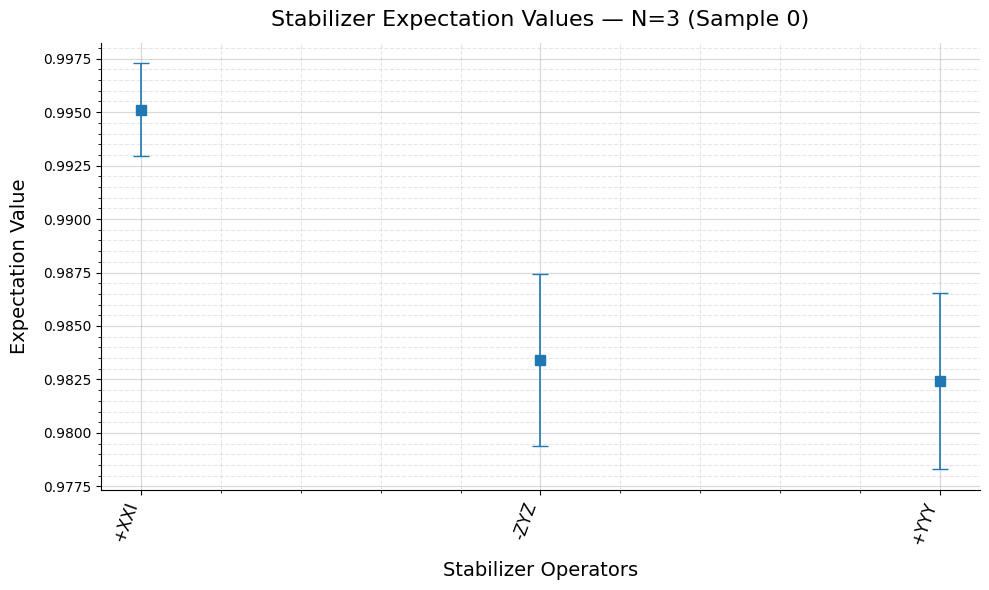

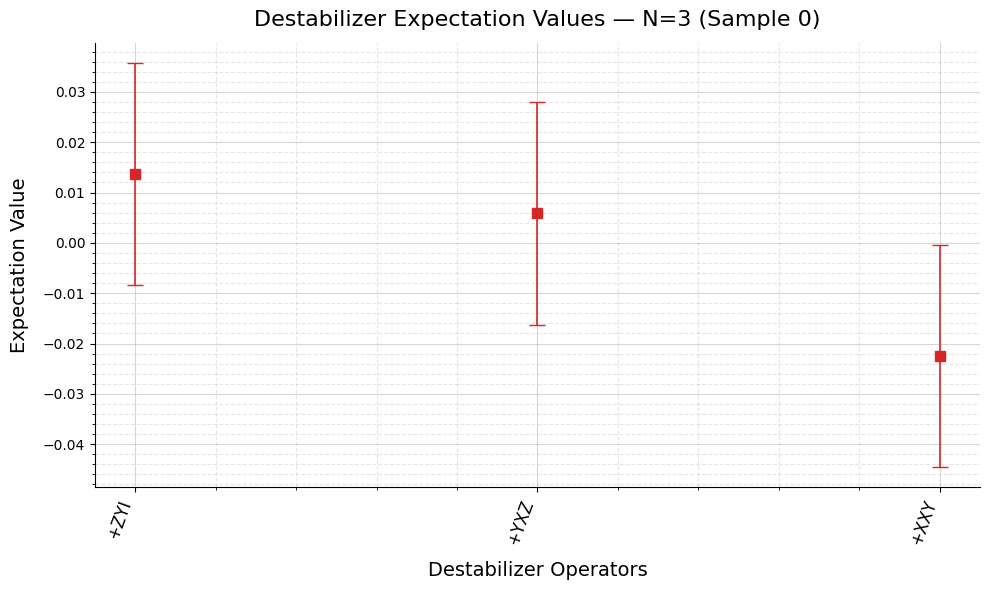

In [29]:
bench.plot_expected_values(0)

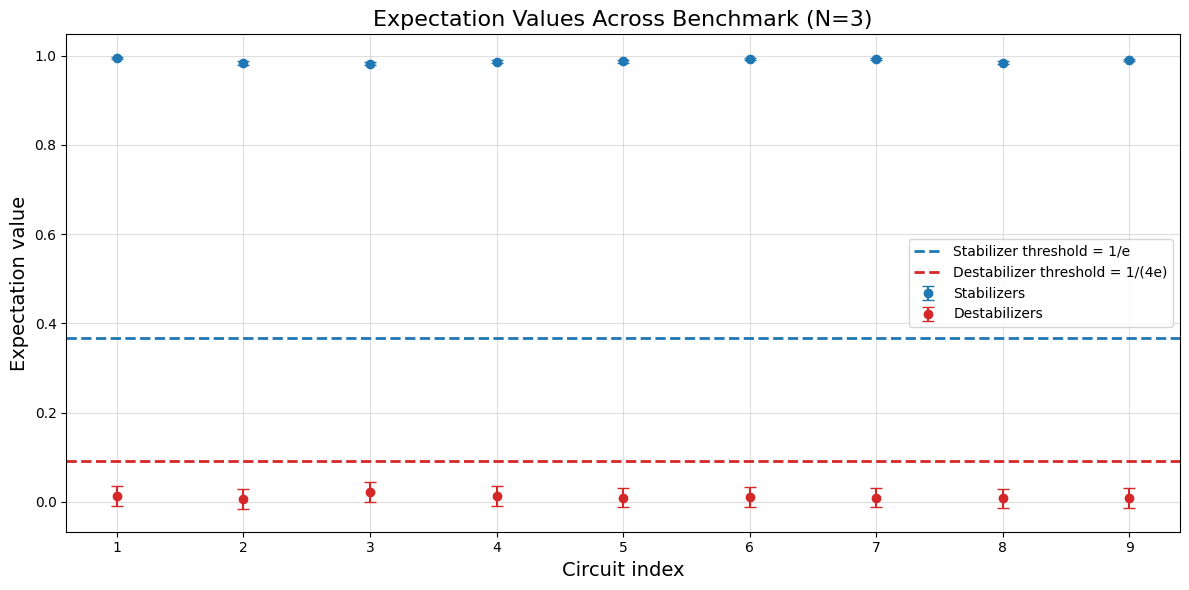

In [30]:
bench.plot_all_expectation_values()

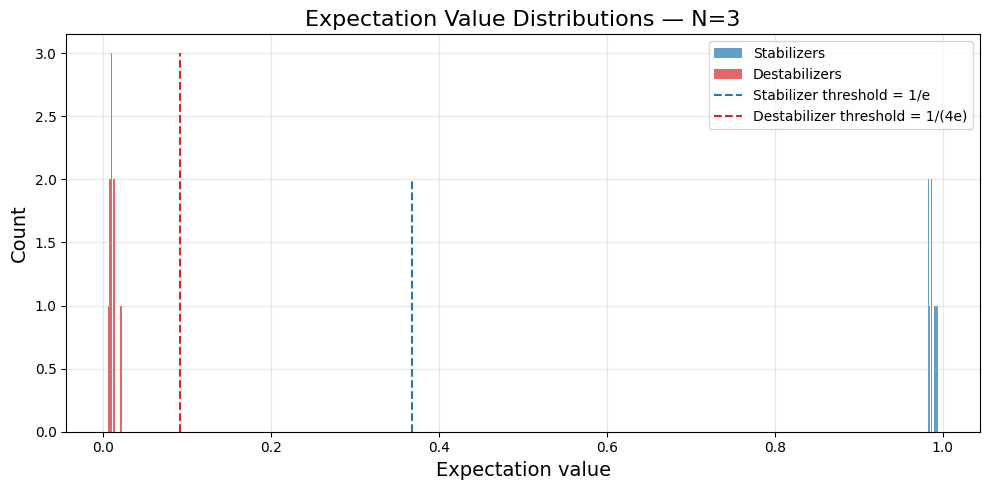

In [31]:
bench.plot_expectation_histograms(bins=10)